In [1]:
print("Hello World")

Hello World


In [2]:
# Accessing the API_key file
with open('api_keys.txt', 'r') as api_key_file:
   api_key = api_key_file.read().strip()

In [3]:
%pip install simplejson

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Packages that I need for my analysis
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Code necessary to query from the OpenFDA API
endpoint = "https://api.fda.gov/food/enforcement.json"

params = {
    'search':'reason_for_recall:"egg"',
    'limit': 500
}

headers = {
    'Content-Type': 'application/json',
    'api_key': api_key
}

response = requests.get(endpoint, params=params, headers=headers)

if response.status_code == 200:
    data = response.json()
else:
    print("Error:", response.status_code)

In [6]:
# Code for placing the queried data into a pandas Data Frame
import pandas as pd

results = data.get('results', [])

df = pd.DataFrame(results)

In [7]:
print(df.dtypes)


country                       object
city                          object
address_1                     object
reason_for_recall             object
address_2                     object
product_quantity              object
code_info                     object
center_classification_date    object
distribution_pattern          object
state                         object
product_description           object
report_date                   object
classification                object
openfda                       object
recalling_firm                object
recall_number                 object
initial_firm_notification     object
product_type                  object
event_id                      object
termination_date              object
recall_initiation_date        object
postal_code                   object
voluntary_mandated            object
status                        object
more_code_info                object
dtype: object


In [8]:
# Code to place the dataframe into a csv file for the first part of the project that I had to turn in
df.to_csv('FDA_egg_stats.csv', index=False)

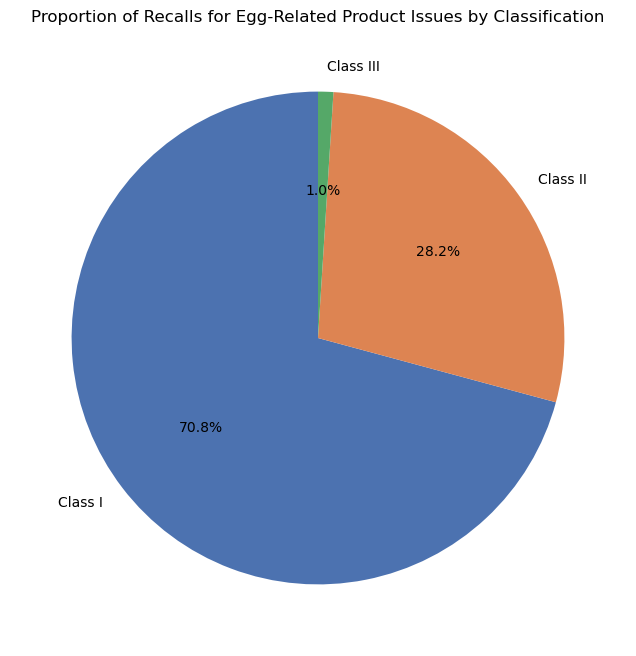

In [9]:
# Code for creating my first visualization, a pie chart
category_order = df['classification'].value_counts().index

plt.figure(figsize=(8, 8))
plt.pie(df['classification'].value_counts(), labels=category_order, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('deep'))

plt.title("Proportion of Recalls for Egg-Related Product Issues by Classification")
plt.show()

Text(0.5, 1.0, 'Count of Recalls for Egg-Related Product Issues by State')

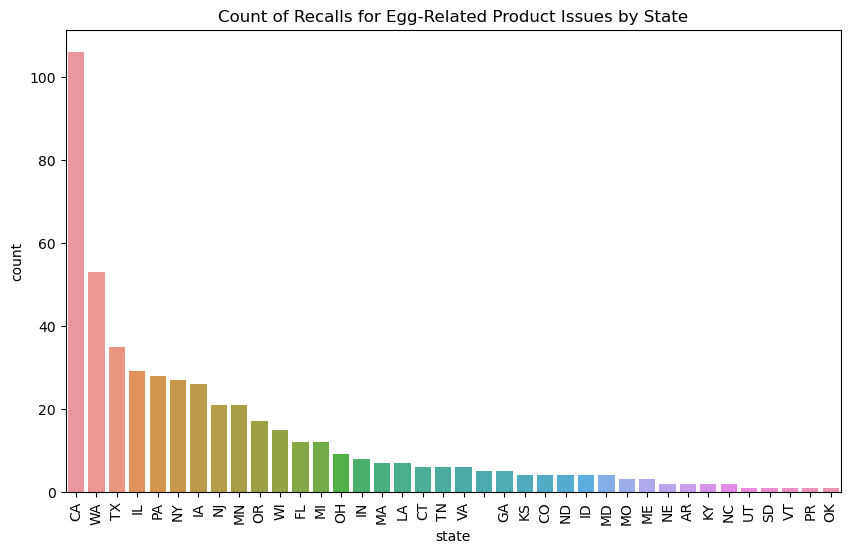

In [10]:
# Code for creating a bar chart of the data as described in the chart below this line
category_order = df['state'].value_counts().index
plt.figure(figsize=(10, 6))
sns.countplot(df, x="state", order = category_order)
plt.xticks(rotation=90) 
plt.title("Count of Recalls for Egg-Related Product Issues by State")

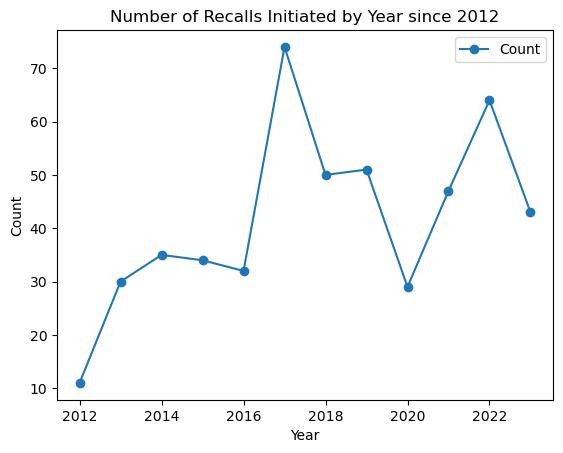

In [11]:
# Code to convert the string "report_date" into a datetime variable
df['datetime_report_date'] = pd.to_datetime(df['report_date'])

# Code for converting the datetime variable made above into three numerical variables for further analysis
df['Year'] = df['datetime_report_date'].dt.year
df['Month'] = df['datetime_report_date'].dt.month
df['Day'] = df['datetime_report_date'].dt.day

# Code for creating a line chart of the recalls based on year
df_counts = df.groupby('Year').size().reset_index(name='Count')

df_counts.set_index('Year', inplace=True)

df_counts.plot(kind='line', marker='o', linestyle='-')
plt.title('Number of Recalls Initiated by Year since 2012')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [12]:
# Code to also turn the "termination date" into a date time variable
df['datetime_termination_date'] = pd.to_datetime(df['termination_date'])

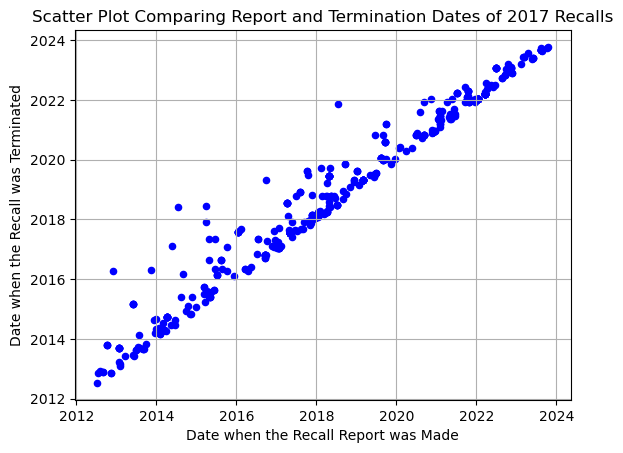

In [13]:
# Code for creating a scatter plot comparing start and end times of the recalls from 2012-2023
ax = df.plot(kind='scatter', x='datetime_report_date', y='datetime_termination_date', marker='o', color='blue')

ax.grid(True)
plt.title('Scatter Plot Comparing Report and Termination Dates of 2017 Recalls')
plt.xlabel('Date when the Recall Report was Made')
plt.ylabel('Date when the Recall was Terminated')

plt.show()

Text(0.5, 1.0, 'Distribution of Classifications by Month')

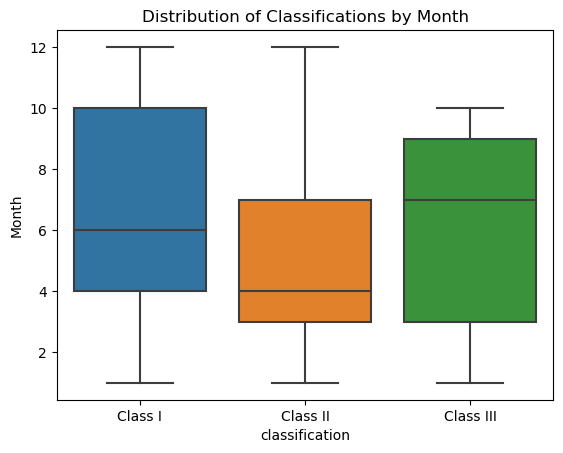

In [14]:
# Code for creating three boxplots describing month and classification
boxplot = sns.boxplot(x="classification", y="Month", data= df)
boxplot.set_title('Distribution of Classifications by Month')


Text(0.5, 1.0, 'Multiple Bar Chart Classification Count by Month of the Year')

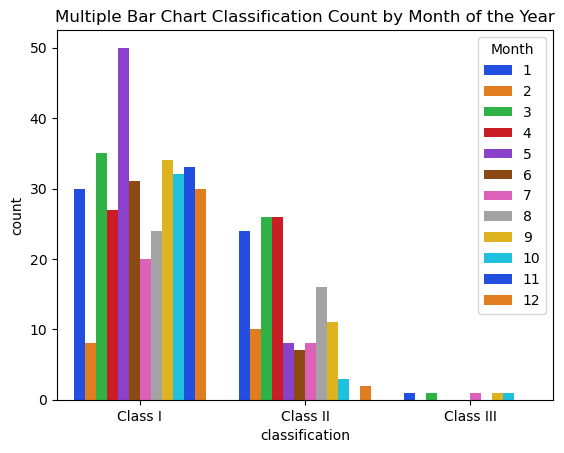

In [15]:
# Code for creating a multiple bar chart that shows month, classification, and count of events
countplot = sns.countplot(df, x="classification", hue = "Month", palette="bright")
countplot.set_title("Multiple Bar Chart Classification Count by Month of the Year")